In [28]:
#!pip install python_speech_features

In [29]:
from os import listdir
from os.path import isdir, join
import random
import librosa
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [30]:
dataset_path="F:\\AI\\capstone_project\\NewMethod\\mini_speech_commands"
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

down
go
left
no
right
stop
up
yes
zero
down
go
left
no
right
stop
up
yes
zero


In [31]:
# create a list of all the words
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes', 'zero']
['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes', 'zero']


In [32]:
#findling the nuber of files in each dir
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

1000
1000
1000
1000
1000
1000
1000
1000
1000
Total samples: 9000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Total samples: 9000


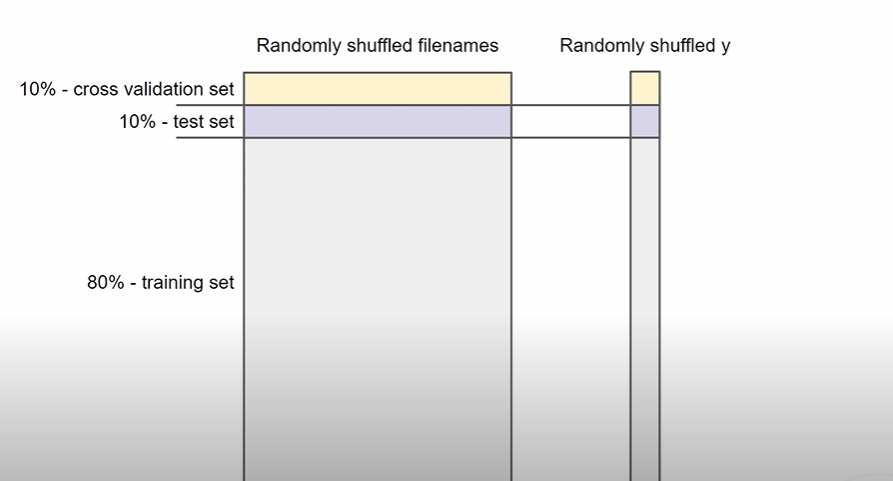

In [33]:
#feature samples settings
target_list= all_targets
feature_sets_file='target_mfcc_sets.npz'
# we will work with a random subset of data
perc_keep_samples=1
#taking 10% from each folders for cross validation and testing purposes
val_ratio=0.1
test_ratio=0.1
# taking sampling rate as 8000 as the wav files are modulated on 16000Hz. Thus satisfying Sampling theorem
sample_rate=8000
num_mfcc=16
# for every sec fing 16 mfcc
len_mfcc=16

In [34]:
#create a list of all file names and storing it for loading and extracting them.
filenames = []
# y stores which folder has what file.
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

F:\AI\capstone_project\NewMethod\mini_speech_commands\down
F:\AI\capstone_project\NewMethod\mini_speech_commands\go
F:\AI\capstone_project\NewMethod\mini_speech_commands\left
F:\AI\capstone_project\NewMethod\mini_speech_commands\no
F:\AI\capstone_project\NewMethod\mini_speech_commands\right
F:\AI\capstone_project\NewMethod\mini_speech_commands\stop
F:\AI\capstone_project\NewMethod\mini_speech_commands\up
F:\AI\capstone_project\NewMethod\mini_speech_commands\yes
F:\AI\capstone_project\NewMethod\mini_speech_commands\zero
F:\AI\capstone_project\NewMethod\mini_speech_commands\down
F:\AI\capstone_project\NewMethod\mini_speech_commands\go
F:\AI\capstone_project\NewMethod\mini_speech_commands\left
F:\AI\capstone_project\NewMethod\mini_speech_commands\no
F:\AI\capstone_project\NewMethod\mini_speech_commands\right
F:\AI\capstone_project\NewMethod\mini_speech_commands\stop
F:\AI\capstone_project\NewMethod\mini_speech_commands\up
F:\AI\capstone_project\NewMethod\mini_speech_commands\yes
F:\AI\cap

In [35]:
#print (y)
for item in y:
    print(len(item))
    #assigning label to each word

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


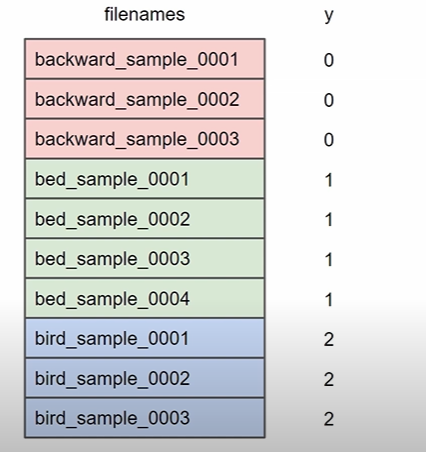

In [36]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [37]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [38]:
# Only keep the specified number of samples (shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))
# working with only 10% of entirew data

9000
9000
9000
9000


MFCC: Transforming audio into Mel Frequency Cepstral Coefficients.
 
 To find MFCC take a small time in the audio and find the fast FT so that we get the freq of that time slice. Then apply the filters so that fast fourier transform spectrum. The filters are linearly spaced below 1KHz and lograthmically spaced above 1KHz. Then sum up the power found in each slice of filter to get a number representig the energy under that fitler. 
 
 Ususally MFCC uses 26 filters for voice.Compute the log of each filter in the vector and calculate the dct of each bank energies.At end we get 26 MFCC(if the initial vectors taken is 26).
 
 For speech we dont walt the 0 element and all the elements after element 13 as after 13 it is usually noise 

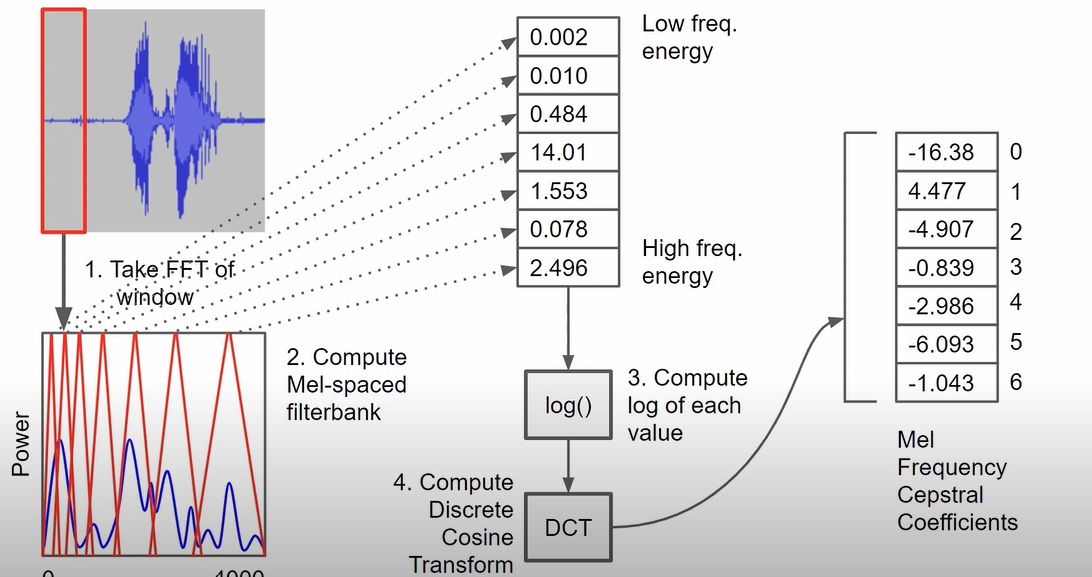

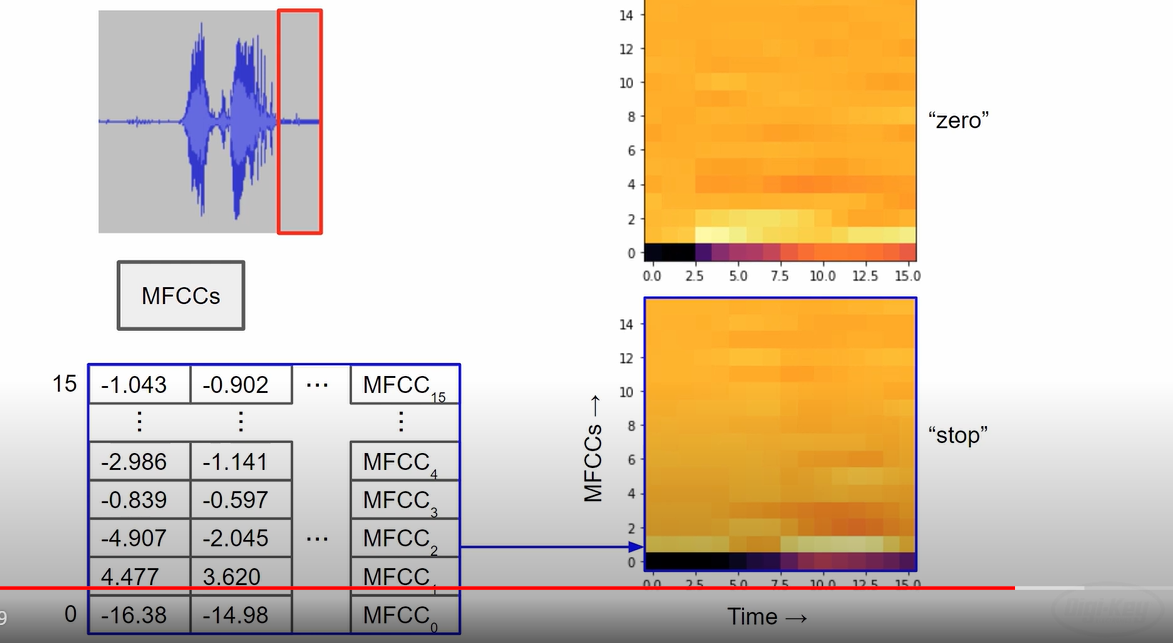

In [39]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [40]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [41]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [42]:
#create MFCC for the given
def calc_mfcc(path):
    
    #load the file and resample it to 8000 sample per second
    signal, fs=librosa.load(path, sr=sample_rate)
    
    #create set of MFCC from sound clip
    
    # no of MFCC is low , 
    #t herefore winlen is kept low(256millisec), 
    # increase the distance between windows to 50 milli second.,
    # taking the first 16 mfcc,
    # no of filters: 26,
    #  FFT (fast fourier transform ) size: 2048( high becoz no of window are low.)
    # preemph, ceplifter – apply preemphasis filter, liftering(here, disabled)
    # winfunc – the analysis window to apply to each frame
    
    mfcc=python_speech_features.base.mfcc(signal, samplerate=fs, winlen=0.256, winstep=0.05, numcep=num_mfcc, nfilt=26, nfft=2048, preemph=0.0, ceplifter=0, appendEnergy=False, winfunc=np.hanning)
    return mfcc.transpose()

In [43]:
# testing the constructed MFCC for each wav file

prob_count=0
fine_count=0
x_test=[]
y_test=[]

for index, filename in enumerate(filenames_train):
    # stop after 500 files
    if index >=500:
        break
    else:
        #create a path 
        path=join(dataset_path,  target_list[int(y_orig_train[index])], 
                filename)
        
        #create the MFCC for the file
        mfccs=calc_mfcc(path)
        
        if mfccs.shape[1]==len_mfcc:
            x_test.append(mfccs)
            y_test.append(y_orig_train[index])
            fine_count+=1
        else:
            print("Dropped: ", index, mfccs.shape)
            prob_count+=1
            
print("\n Total files samples ",index )
print( "\n Fine Files Count: ",fine_count)
print("\n Problematic files: ",prob_count)

Dropped:  2 (16, 14)
Dropped:  2 (16, 14)
Dropped:  8 (16, 14)
Dropped:  11 (16, 15)
Dropped:  12 (16, 11)
Dropped:  8 (16, 14)
Dropped:  11 (16, 15)
Dropped:  12 (16, 11)
Dropped:  17 (16, 15)
Dropped:  20 (16, 9)
Dropped:  17 (16, 15)
Dropped:  20 (16, 9)
Dropped:  38 (16, 10)
Dropped:  42 (16, 7)
Dropped:  38 (16, 10)
Dropped:  42 (16, 7)
Dropped:  44 (16, 10)
Dropped:  44 (16, 10)
Dropped:  49 (16, 12)
Dropped:  49 (16, 12)
Dropped:  56 (16, 14)
Dropped:  57 (16, 15)
Dropped:  59 (16, 12)
Dropped:  56 (16, 14)
Dropped:  57 (16, 15)
Dropped:  59 (16, 12)
Dropped:  68 (16, 11)
Dropped:  68 (16, 11)
Dropped:  89 (16, 12)
Dropped:  91 (16, 11)
Dropped:  89 (16, 12)
Dropped:  91 (16, 11)
Dropped:  95 (16, 15)
Dropped:  97 (16, 9)
Dropped:  95 (16, 15)
Dropped:  97 (16, 9)
Dropped:  113 (16, 10)
Dropped:  113 (16, 10)
Dropped:  118 (16, 8)
Dropped:  118 (16, 8)
Dropped:  130 (16, 15)
Dropped:  135 (16, 7)
Dropped:  130 (16, 15)
Dropped:  135 (16, 7)
Dropped:  139 (16, 12)
Dropped:  140 (

In [44]:
# finding the accuracy of corrupted files
print("% of problematic samples : ", prob_count/500)

% of problematic samples :  0.156
% of problematic samples :  0.156


Nearly 10% of the entire data sample have the problem.

In [45]:
## Testing a problematic file
#!pip install playsound

In [46]:
from playsound import playsound

right
right


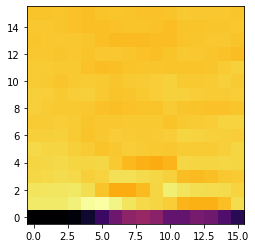

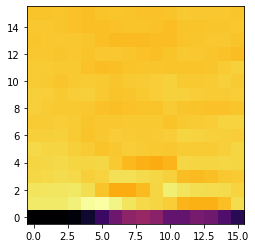

In [47]:
idx=13

path= join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
#print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

# 

## Since approx 15% of the entire is problematic for the dataset, we will drop the problematic part, i.e., those not producing exactly 16 sets of mfcc

In [48]:
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [49]:
# running the func ton every validation and testing dataset.
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))


Dropped: 2 (16, 14)
Dropped: 8 (16, 14)
Dropped: 11 (16, 15)
Dropped: 12 (16, 11)
Dropped: 2 (16, 14)
Dropped: 8 (16, 14)
Dropped: 11 (16, 15)
Dropped: 12 (16, 11)
Dropped: 17 (16, 15)
Dropped: 20 (16, 9)
Dropped: 17 (16, 15)
Dropped: 20 (16, 9)
Dropped: 38 (16, 10)
Dropped: 42 (16, 7)
Dropped: 44 (16, 10)
Dropped: 38 (16, 10)
Dropped: 42 (16, 7)
Dropped: 44 (16, 10)
Dropped: 49 (16, 12)
Dropped: 49 (16, 12)
Dropped: 56 (16, 14)
Dropped: 57 (16, 15)
Dropped: 59 (16, 12)
Dropped: 56 (16, 14)
Dropped: 57 (16, 15)
Dropped: 59 (16, 12)
Dropped: 68 (16, 11)
Dropped: 68 (16, 11)
Dropped: 89 (16, 12)
Dropped: 91 (16, 11)
Dropped: 89 (16, 12)
Dropped: 91 (16, 11)
Dropped: 95 (16, 15)
Dropped: 97 (16, 9)
Dropped: 95 (16, 15)
Dropped: 97 (16, 9)
Dropped: 113 (16, 10)
Dropped: 113 (16, 10)
Dropped: 118 (16, 8)
Dropped: 118 (16, 8)
Dropped: 130 (16, 15)
Dropped: 130 (16, 15)
Dropped: 135 (16, 7)
Dropped: 135 (16, 7)
Dropped: 139 (16, 12)
Dropped: 140 (16, 9)
Dropped: 141 (16, 11)
Dropped: 139 (16,

Dropped: 1047 (16, 13)
Dropped: 1047 (16, 13)
Dropped: 1065 (16, 11)
Dropped: 1065 (16, 11)
Dropped: 1069 (16, 11)
Dropped: 1069 (16, 11)
Dropped: 1078 (16, 11)
Dropped: 1078 (16, 11)
Dropped: 1093 (16, 13)
Dropped: 1093 (16, 13)
Dropped: 1097 (16, 8)
Dropped: 1099 (16, 9)
Dropped: 1097 (16, 8)
Dropped: 1099 (16, 9)
Dropped: 1119 (16, 9)
Dropped: 1119 (16, 9)
Dropped: 1127 (16, 15)
Dropped: 1127 (16, 15)
Dropped: 1133 (16, 11)
Dropped: 1133 (16, 11)
Dropped: 1147 (16, 11)
Dropped: 1149 (16, 13)
Dropped: 1150 (16, 10)
Dropped: 1147 (16, 11)
Dropped: 1149 (16, 13)
Dropped: 1150 (16, 10)
Dropped: 1161 (16, 11)
Dropped: 1161 (16, 11)
Dropped: 1170 (16, 9)
Dropped: 1170 (16, 9)
Dropped: 1205 (16, 8)
Dropped: 1208 (16, 8)
Dropped: 1205 (16, 8)
Dropped: 1208 (16, 8)
Dropped: 1212 (16, 8)
Dropped: 1216 (16, 15)
Dropped: 1212 (16, 8)
Dropped: 1216 (16, 15)
Dropped: 1218 (16, 10)
Dropped: 1221 (16, 9)
Dropped: 1218 (16, 10)
Dropped: 1221 (16, 9)
Dropped: 1239 (16, 11)
Dropped: 1239 (16, 11)
Drop

Dropped: 2113 (16, 13)
Dropped: 2115 (16, 11)
Dropped: 2113 (16, 13)
Dropped: 2115 (16, 11)
Dropped: 2120 (16, 11)
Dropped: 2121 (16, 11)
Dropped: 2120 (16, 11)
Dropped: 2121 (16, 11)
Dropped: 2126 (16, 11)
Dropped: 2126 (16, 11)
Dropped: 2131 (16, 15)
Dropped: 2133 (16, 11)
Dropped: 2131 (16, 15)
Dropped: 2133 (16, 11)
Dropped: 2141 (16, 10)
Dropped: 2141 (16, 10)
Dropped: 2151 (16, 11)
Dropped: 2151 (16, 11)
Dropped: 2161 (16, 8)
Dropped: 2161 (16, 8)
Dropped: 2171 (16, 10)
Dropped: 2171 (16, 10)
Dropped: 2181 (16, 13)
Dropped: 2183 (16, 11)
Dropped: 2181 (16, 13)
Dropped: 2183 (16, 11)
Dropped: 2195 (16, 15)
Dropped: 2195 (16, 15)
Dropped: 2200 (16, 15)
Dropped: 2200 (16, 15)
Dropped: 2206 (16, 11)
Dropped: 2206 (16, 11)
Dropped: 2214 (16, 11)
Dropped: 2218 (16, 12)
Dropped: 2214 (16, 11)
Dropped: 2218 (16, 12)
Dropped: 2221 (16, 14)
Dropped: 2221 (16, 14)
Dropped: 2228 (16, 12)
Dropped: 2230 (16, 10)
Dropped: 2228 (16, 12)
Dropped: 2230 (16, 10)
Dropped: 2242 (16, 10)
Dropped: 2243

Dropped: 3061 (16, 11)
Dropped: 3074 (16, 7)
Dropped: 3077 (16, 8)
Dropped: 3074 (16, 7)
Dropped: 3077 (16, 8)
Dropped: 3080 (16, 10)
Dropped: 3081 (16, 10)
Dropped: 3082 (16, 10)
Dropped: 3083 (16, 8)
Dropped: 3080 (16, 10)
Dropped: 3081 (16, 10)
Dropped: 3082 (16, 10)
Dropped: 3083 (16, 8)
Dropped: 3087 (16, 13)
Dropped: 3087 (16, 13)
Dropped: 3100 (16, 9)
Dropped: 3105 (16, 8)
Dropped: 3100 (16, 9)
Dropped: 3105 (16, 8)
Dropped: 3115 (16, 13)
Dropped: 3115 (16, 13)
Dropped: 3125 (16, 14)
Dropped: 3125 (16, 14)
Dropped: 3136 (16, 10)
Dropped: 3136 (16, 10)
Dropped: 3140 (16, 13)
Dropped: 3142 (16, 8)
Dropped: 3144 (16, 10)
Dropped: 3140 (16, 13)
Dropped: 3142 (16, 8)
Dropped: 3144 (16, 10)
Dropped: 3147 (16, 13)
Dropped: 3147 (16, 13)
Dropped: 3155 (16, 9)
Dropped: 3155 (16, 9)
Dropped: 3164 (16, 9)
Dropped: 3164 (16, 9)
Dropped: 3172 (16, 9)
Dropped: 3173 (16, 11)
Dropped: 3172 (16, 9)
Dropped: 3173 (16, 11)
Dropped: 3178 (16, 9)
Dropped: 3181 (16, 15)
Dropped: 3183 (16, 13)
Dropped

Dropped: 4080 (16, 9)
Dropped: 4081 (16, 8)
Dropped: 4080 (16, 9)
Dropped: 4081 (16, 8)
Dropped: 4100 (16, 9)
Dropped: 4105 (16, 6)
Dropped: 4100 (16, 9)
Dropped: 4105 (16, 6)
Dropped: 4107 (16, 13)
Dropped: 4108 (16, 11)
Dropped: 4107 (16, 13)
Dropped: 4108 (16, 11)
Dropped: 4115 (16, 12)
Dropped: 4118 (16, 12)
Dropped: 4115 (16, 12)
Dropped: 4118 (16, 12)
Dropped: 4120 (16, 14)
Dropped: 4123 (16, 13)
Dropped: 4124 (16, 9)
Dropped: 4120 (16, 14)
Dropped: 4123 (16, 13)
Dropped: 4124 (16, 9)
Dropped: 4125 (16, 11)
Dropped: 4127 (16, 8)
Dropped: 4129 (16, 10)
Dropped: 4125 (16, 11)
Dropped: 4127 (16, 8)
Dropped: 4129 (16, 10)
Dropped: 4132 (16, 15)
Dropped: 4132 (16, 15)
Dropped: 4139 (16, 10)
Dropped: 4140 (16, 14)
Dropped: 4139 (16, 10)
Dropped: 4140 (16, 14)
Dropped: 4148 (16, 12)
Dropped: 4148 (16, 12)
Dropped: 4160 (16, 8)
Dropped: 4160 (16, 8)
Dropped: 4165 (16, 9)
Dropped: 4165 (16, 9)
Dropped: 4171 (16, 7)
Dropped: 4172 (16, 15)
Dropped: 4171 (16, 7)
Dropped: 4172 (16, 15)
Droppe

Dropped: 5126 (16, 6)
Dropped: 5130 (16, 9)
Dropped: 5131 (16, 14)
Dropped: 5132 (16, 13)
Dropped: 5134 (16, 10)
Dropped: 5131 (16, 14)
Dropped: 5132 (16, 13)
Dropped: 5134 (16, 10)
Dropped: 5147 (16, 9)
Dropped: 5147 (16, 9)
Dropped: 5150 (16, 11)
Dropped: 5151 (16, 7)
Dropped: 5150 (16, 11)
Dropped: 5151 (16, 7)
Dropped: 5160 (16, 14)
Dropped: 5160 (16, 14)
Dropped: 5164 (16, 13)
Dropped: 5164 (16, 13)
Dropped: 5169 (16, 12)
Dropped: 5169 (16, 12)
Dropped: 5181 (16, 12)
Dropped: 5182 (16, 8)
Dropped: 5181 (16, 12)
Dropped: 5182 (16, 8)
Dropped: 5188 (16, 11)
Dropped: 5189 (16, 14)
Dropped: 5190 (16, 12)
Dropped: 5188 (16, 11)
Dropped: 5189 (16, 14)
Dropped: 5190 (16, 12)
Dropped: 5193 (16, 12)
Dropped: 5195 (16, 11)
Dropped: 5193 (16, 12)
Dropped: 5195 (16, 11)
Dropped: 5197 (16, 11)
Dropped: 5199 (16, 7)
Dropped: 5197 (16, 11)
Dropped: 5199 (16, 7)
Dropped: 5203 (16, 9)
Dropped: 5203 (16, 9)
Dropped: 5214 (16, 10)
Dropped: 5214 (16, 10)
Dropped: 5223 (16, 11)
Dropped: 5223 (16, 11)


Dropped: 6053 (16, 12)
Dropped: 6053 (16, 12)
Dropped: 6059 (16, 14)
Dropped: 6062 (16, 8)
Dropped: 6059 (16, 14)
Dropped: 6062 (16, 8)
Dropped: 6069 (16, 8)
Dropped: 6072 (16, 8)
Dropped: 6069 (16, 8)
Dropped: 6072 (16, 8)
Dropped: 6073 (16, 9)
Dropped: 6074 (16, 10)
Dropped: 6073 (16, 9)
Dropped: 6074 (16, 10)
Dropped: 6080 (16, 7)
Dropped: 6082 (16, 10)
Dropped: 6080 (16, 7)
Dropped: 6082 (16, 10)
Dropped: 6092 (16, 8)
Dropped: 6093 (16, 9)
Dropped: 6092 (16, 8)
Dropped: 6093 (16, 9)
Dropped: 6099 (16, 8)
Dropped: 6099 (16, 8)
Dropped: 6109 (16, 11)
Dropped: 6109 (16, 11)
Dropped: 6115 (16, 7)
Dropped: 6116 (16, 10)
Dropped: 6115 (16, 7)
Dropped: 6116 (16, 10)
Dropped: 6119 (16, 14)
Dropped: 6119 (16, 14)
Dropped: 6128 (16, 12)
Dropped: 6129 (16, 10)
Dropped: 6128 (16, 12)
Dropped: 6129 (16, 10)
Dropped: 6137 (16, 9)
Dropped: 6137 (16, 9)
Dropped: 6141 (16, 10)
Dropped: 6141 (16, 10)
Dropped: 6147 (16, 9)
Dropped: 6148 (16, 10)
Dropped: 6147 (16, 9)
Dropped: 6148 (16, 10)
Dropped: 6

Dropped: 7012 (16, 12)
Dropped: 7015 (16, 11)
Dropped: 7012 (16, 12)
Dropped: 7015 (16, 11)
Dropped: 7023 (16, 15)
Dropped: 7023 (16, 15)
Dropped: 7027 (16, 8)
Dropped: 7027 (16, 8)
Dropped: 7039 (16, 10)
Dropped: 7040 (16, 15)
Dropped: 7041 (16, 8)
Dropped: 7039 (16, 10)
Dropped: 7040 (16, 15)
Dropped: 7041 (16, 8)
Dropped: 7048 (16, 14)
Dropped: 7048 (16, 14)
Dropped: 7053 (16, 10)
Dropped: 7053 (16, 10)
Dropped: 7068 (16, 8)
Dropped: 7072 (16, 11)
Dropped: 7068 (16, 8)
Dropped: 7072 (16, 11)
Dropped: 7073 (16, 7)
Dropped: 7073 (16, 7)
Dropped: 7089 (16, 10)
Dropped: 7091 (16, 8)
Dropped: 7089 (16, 10)
Dropped: 7091 (16, 8)
Dropped: 7096 (16, 10)
Dropped: 7096 (16, 10)
Dropped: 7101 (16, 8)
Dropped: 7102 (16, 10)
Dropped: 7103 (16, 6)
Dropped: 7101 (16, 8)
Dropped: 7102 (16, 10)
Dropped: 7103 (16, 6)
Dropped: 7109 (16, 15)
Dropped: 7110 (16, 9)
Dropped: 7113 (16, 10)
Dropped: 7109 (16, 15)
Dropped: 7110 (16, 9)
Dropped: 7113 (16, 10)
Dropped: 7117 (16, 14)
Dropped: 7117 (16, 14)
Drop

In [50]:
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))

Dropped: 4 (16, 11)
Dropped: 4 (16, 11)
Dropped: 22 (16, 10)
Dropped: 22 (16, 10)
Dropped: 28 (16, 10)
Dropped: 28 (16, 10)
Dropped: 34 (16, 14)
Dropped: 38 (16, 11)
Dropped: 34 (16, 14)
Dropped: 38 (16, 11)
Dropped: 47 (16, 12)
Dropped: 48 (16, 14)
Dropped: 49 (16, 10)
Dropped: 47 (16, 12)
Dropped: 48 (16, 14)
Dropped: 49 (16, 10)
Dropped: 54 (16, 8)
Dropped: 54 (16, 8)
Dropped: 59 (16, 11)
Dropped: 60 (16, 11)
Dropped: 63 (16, 10)
Dropped: 59 (16, 11)
Dropped: 60 (16, 11)
Dropped: 63 (16, 10)
Dropped: 75 (16, 14)
Dropped: 76 (16, 8)
Dropped: 75 (16, 14)
Dropped: 76 (16, 8)
Dropped: 88 (16, 14)
Dropped: 90 (16, 8)
Dropped: 88 (16, 14)
Dropped: 90 (16, 8)
Dropped: 99 (16, 9)
Dropped: 101 (16, 10)
Dropped: 103 (16, 9)
Dropped: 99 (16, 9)
Dropped: 101 (16, 10)
Dropped: 103 (16, 9)
Dropped: 104 (16, 11)
Dropped: 104 (16, 11)
Dropped: 106 (16, 12)
Dropped: 107 (16, 10)
Dropped: 110 Dropped: 106 (16, 12)
Dropped: 107 (16, 10)
Dropped: 110 (16, 9)
(16, 9)
Dropped: 115 (16, 10)
Dropped: 116 (

In [51]:
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 6 (16, 14)
Dropped: 8 (16, 10)
Dropped: 6 (16, 14)
Dropped: 8 (16, 10)
Dropped: 9 (16, 11)
Dropped: 11 (16, 14)
Dropped: 13 (16, 10)
Dropped: 9 (16, 11)
Dropped: 11 (16, 14)
Dropped: 13 (16, 10)
Dropped: 19 (16, 15)
Dropped: 21 (16, 13)
Dropped: 23 (16, 10)
Dropped: 19 (16, 15)
Dropped: 21 (16, 13)
Dropped: 23 (16, 10)
Dropped: 24 (16, 10)
Dropped: 24 (16, 10)
Dropped: 39 (16, 7)
Dropped: 39 (16, 7)
Dropped: 43 (16, 11)
Dropped: 45 (16, 10)
Dropped: 43 (16, 11)
Dropped: 45 (16, 10)
Dropped: 52 (16, 11)
Dropped: 52 (16, 11)
Dropped: 58 (16, 11)
Dropped: 58 (16, 11)
Dropped: 64 (16, 13)
Dropped: 68 (16, 14)
Dropped: 64 (16, 13)
Dropped: 68 (16, 14)
Dropped: 69 (16, 8)
Dropped: 70 (16, 9)
Dropped: 71 (16, 7)
Dropped: 69 (16, 8)
Dropped: 70 (16, 9)
Dropped: 71 (16, 7)
Dropped: 73 (16, 8)
Dropped: 73 (16, 8)
Dropped: 81 (16, 8)
Dropped: 81 (16, 8)
Dropped: 85 (16, 15)
Dropped: 85 (16, 15)
Dropped: 100 (16, 12)
Dropped: 100 (16, 12)
Dropped: 113 (16, 12)
Dropped: 113 (16, 12)
Droppe

In [52]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [53]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [54]:
print(feature_sets['y_val'])

[2. 4. 2. 1. 4. 0. 3. 1. 1. 3. 2. 0. 6. 6. 0. 4. 7. 4. 6. 1. 1. 0. 6. 0.
 0. 5. 1. 1. 0. 3. 0. 7. 2. 1. 5. 2. 1. 4. 3. 6. 4. 0. 6. 3. 6. 4. 5. 4.
 3. 1. 1. 6. 7. 3. 4. 4. 5. 6. 2. 2. 5. 2. 1. 4. 3. 7. 1. 6. 3. 3. 2. 6.
 1. 5. 0. 7. 4. 1. 6. 7. 1. 2. 1. 0. 5. 2. 2. 3. 1. 1. 0. 6. 5. 7. 0. 2.
 2. 3. 0. 5. 5. 7. 7. 3. 3. 0. 0. 3. 0. 3. 3. 4. 1. 6. 3. 3. 1. 6. 5. 0.
 1. 4. 2. 1. 1. 4. 7. 7. 7. 2. 4. 6. 5. 4. 4. 0. 4. 4. 2. 4. 3. 7. 2. 6.
 7. 5. 7. 6. 3. 3. 2. 3. 1. 7. 0. 7. 3. 6. 7. 7. 7. 1. 5. 5. 0. 0. 7. 1.
 6. 7. 7. 3. 4. 1. 7. 4. 3. 5. 2. 7. 1. 7. 1. 4. 1. 5. 4. 0. 3. 0. 1. 0.
 5. 2. 4. 6. 1. 2. 5. 6. 2. 7. 4. 4. 1. 6. 2. 2. 2. 4. 3. 4. 4. 6. 5. 4.
 4. 1. 3. 7. 3. 3. 6. 0. 3. 4. 4. 4. 4. 5. 4. 1. 0. 4. 3. 7. 5. 4. 2. 0.
 5. 7. 5. 4. 0. 5. 3. 4. 3. 7. 2. 0. 4. 0. 3. 0. 0. 3. 6. 4. 4. 0. 4. 6.
 3. 3. 1. 0. 3. 3. 0. 5. 5. 2. 5. 0. 3. 3. 1. 4. 4. 0. 6. 0. 4. 2. 1. 3.
 2. 3. 3. 0. 3. 1. 3. 7. 5. 7. 0. 0. 0. 0. 5. 7. 4. 4. 6. 3. 5. 0. 2. 0.
 5. 5. 1. 1. 4. 3. 7. 3. 6. 0. 7. 4. 6. 2. 7. 3. 1.